In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.
import pandas as pd
import numpy as np
import sys
from causalgraphicalmodels import CausalGraphicalModel
from sklearn.model_selection import train_test_split
import dowhy
from dowhy import CausalModel
from IPython.display import Image, display
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('../data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df = data.copy()

In [18]:
df['diagnosis']=df['diagnosis'].map({'B':1,'M':0})
df = df.iloc[: , :-1]
df = df.iloc[: , 1:]
df_1=df.copy()

df_1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [19]:
y = df.iloc[:, 1].values
labelencoder_X_1 = LabelEncoder() # Encoding categorical data
y = labelencoder_X_1.fit_transform(y)
y

array([370, 426, 406,  98, 418, 159, 376, 233, 192, 160, 324, 322, 394,
       323, 234, 273, 280, 328, 410, 222, 196,  28, 310, 436, 341, 351,
       274, 381, 308, 362, 382, 125, 347, 398, 328, 343, 259, 194, 295,
       217, 213,  73, 391, 206, 201, 383,   4, 201, 137, 218, 122, 227,
       131, 375, 301, 106, 397, 282, 195,   9,  49,   8, 259,  19, 170,
       285,  27,  91,  17, 176, 388,  14, 353, 239, 151, 326, 221, 373,
       415, 181, 100, 208, 451, 392, 134, 379, 270, 390, 154, 279, 278,
       311, 205, 214, 299, 417, 142,  41, 109, 266, 225,   0, 142,  43,
        58, 197, 113, 154, 443,  94,  40, 167, 260,  59,  11, 130,  15,
       289, 322, 369,  97, 384, 449, 271, 209, 242, 225, 389, 301, 408,
       143, 312, 330, 319, 378, 175, 119,  99, 292,  88,  37, 327,  99,
       185,  65, 129, 123, 292, 267, 235, 192,   5,  36,  81, 199, 148,
       364, 345, 138,  70, 121, 396, 404, 153, 446, 294,  66, 344, 360,
       294, 152, 212, 312,  78,  63,  10,  44, 338, 193, 178, 45

In [20]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800


In [21]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

<AxesSubplot:>

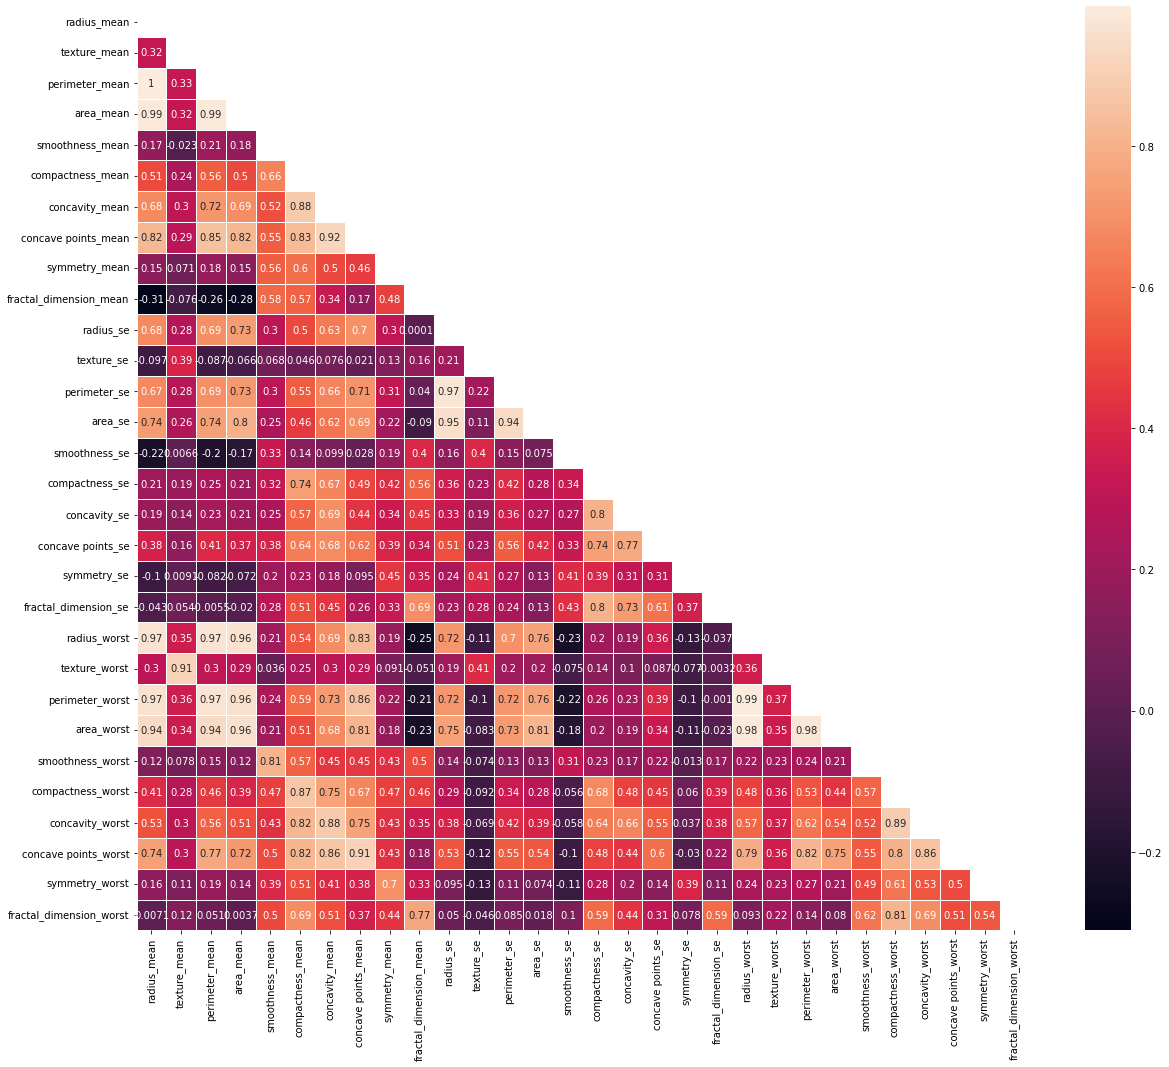

In [22]:
plt.figure(figsize=(20, 17))
matrix = np.triu(x.corr())
sns.heatmap(x.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")

In [12]:
Given that from usaual mathimatics and the corrilation we did in EDA part we see  radius which can affect the
value of perimeter,area, compactness,concavity,smoothness and so on.So using this we can formulate questions:
    
    1. if radius_mean getting low then breast tumors being diagnosed as benign.
    
    2. if texture dencity increase then breast tumors being diagnosed.

In [ ]:
df.describe()

In [3]:
git add feature_selection.ipynb
!git commit -m "feature selection strted"
!git push

[start 53cd671] feature selection strted
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 notebooks/feature_selection.ipynb


remote: This repository moved. Please use the new location:        
remote:   https://github.com/gezish/causal_inference_using_ml.git        
To https://github.com/gezish/causal_nference_using_ml.git
   c5b203f..53cd671  start -> start
